# 7. Fuzzy Clustering

- Autor: Rodrigo Salas, Dr. Ing.
- email: rodrigo.salas@uv.cl

En este notebook exploraremos el toolbox de SciKit-Fuzzy. Este documento está basado en la guía de usuario publicada:

https://pythonhosted.org/scikit-fuzzy/userguide/getting_started.html

Revisar la licencia de los códigos en:

https://pythonhosted.org/scikit-fuzzy/license.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


%matplotlib inline

## 7.1. Generación de los datos sintéticos

In [4]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Definición de los centros de los cluster
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Definición de las desviación estándar de los cluster
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generar Datos de Test
np.random.seed(42)  
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))



## 7.2. Visualización de los clusters de los datos de prueba

Text(0.5, 1.0, 'Datos de Test: 200 puntos en 3 clusters')

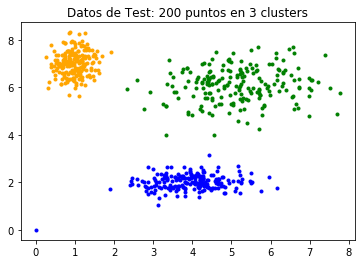

In [5]:
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Datos de Test: 200 puntos en 3 clusters')


## 7.3. Clustering de los datos

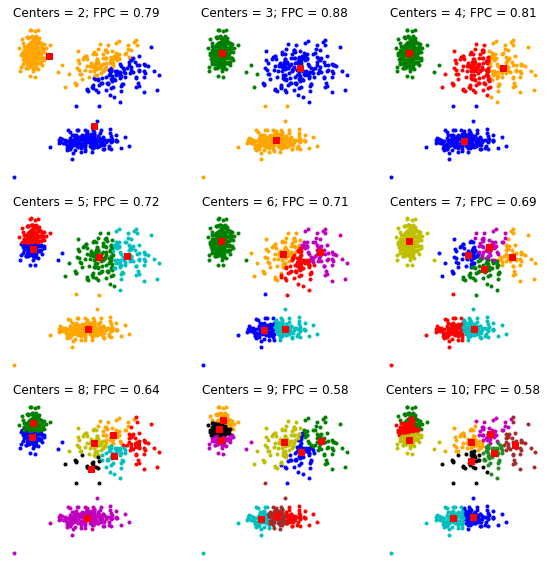

In [6]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    fpcs.append(fpc)

    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()